# Feature Engineering
---
Dropping some params that made training pretty broken, and converting catagorical vars to one hot encodings

In [1]:
import pandas
import seaborn as sns

In [2]:
import sklearn

In [3]:
df = pandas.read_csv("presets_all_names_with_names.csv")

In [4]:
df

,name,osc1 shape,osc1 fm modulation,osc2 shape,osc2 pitch,osc2 tune,osc2 kbd track,osc mix,osc sync,osc ring modulation,...,lfo1 on/off,lfo1 destination,lfo1 type,lfo1 speed,lfo1 depth,lfo2 on/off,lfo2 destination,lfo2 type,lfo2 speed,lfo2 depth
0,015,2,30,1,67,66,1,70,0,0,...,0,7,1,82,40,1,3,1,49,85
1,014,3,0,2,64,64,1,108,0,0,...,1,2,1,77,0,0,5,1,64,64
2,050,1,0,2,73,62,1,51,0,0,...,0,2,1,64,64,0,5,1,63,64
3,056,1,0,1,39,62,1,51,0,0,...,1,2,1,82,1,0,2,1,64,0
4,031,0,0,3,36,81,0,127,0,0,...,1,2,1,60,0,0,7,2,63,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12698,Organ 4 stab,0,58,3,84,78,1,61,0,0,...,1,1,0,87,1,0,5,1,64,64
12699,Whistle,0,21,3,0,0,0,0,0,0,...,0,2,1,64,0,0,5,1,64,64
12700,DX7 Pretty Bell,0,82,2,87,64,1,0,0,0,...,0,4,1,64,24,0,5,1,64,64
12701,OldSkool Murk Bass,1,0,2,39,66,1,64,0,0,...,0,2,1,64,0,0,5,1,64,64


In [5]:
df["osc2 tune"].value_counts()

66     1698
81     1446
64     1146
75      783
65      766
       ... 
104       3
115       2
126       1
120       1
25        1
Name: osc2 tune, Length: 127, dtype: int64

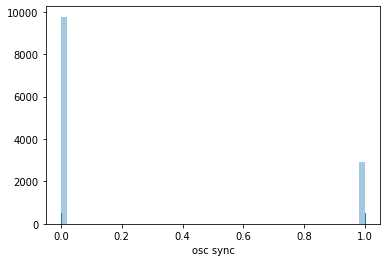

In [6]:
sns.distplot(df["osc sync"], kde=False, rug=True);

In [7]:
df.columns

Index(['name', 'osc1 shape', 'osc1 fm modulation', 'osc2 shape', 'osc2 pitch',
       'osc2 tune', 'osc2 kbd track', 'osc mix', 'osc sync',
       'osc ring modulation', 'osc pulse width', 'osc key shift',
       'osc mod env on/off', 'osc mod env amount', 'osc mod env attack',
       'osc p.env decay', 'filter type', 'filter attack', 'filter decay',
       'filter sustain', 'filter release', 'filter freq', 'filter resonance',
       'filter amount', 'filter kbd track', 'filter distortion',
       'filter velocity switch', 'amp attack', 'amp decay', 'amp sustain',
       'amp release', 'amp gain', 'amp velocity sens.', 'arp. on/off',
       'arp type', 'arp range', 'arp beat', 'arp gate', 'delay on/off',
       'delay time', 'delay feedback', 'delay level', 'chorus on/off',
       'chorus type', 'chorus delay time', 'chorus depth', 'chorus rate',
       'chorus feedback', 'chorus level', 'equalizer tone', 'equalizer freq.',
       'equalizer level', 'equalizer Q', 'play mode type',
   

In [10]:
#Columns that either don't make sense to train or or were very finicky in the model
to_drop = [
    "name",
    "osc1 fm modulation",
    "osc2 pitch",
    "osc2 kbd track",
    "osc key shift",
    "arp. on/off",
    "arp type",
    "arp range",
    "arp beat",
    "arp gate",
    "equalizer tone",
    "equalizer freq.",
    "equalizer level",
    "equalizer Q",
    "pitch bend range"
]

In [11]:
catagorical_vars = [
    "osc1 shape",
    "osc2 shape",
    "osc mod env dest.",
    "filter type",
    "chorus type",
    "play mode type",
    "lfo1 destination",
    "lfo1 type",
    "lfo2 destination",
    "lfo2 type",
]

In [12]:
df_reduced = df.drop(columns=to_drop)

In [13]:
df_reduced

,osc1 shape,osc2 shape,osc2 tune,osc mix,osc sync,osc ring modulation,osc pulse width,osc mod env on/off,osc mod env amount,osc mod env attack,...,lfo1 on/off,lfo1 destination,lfo1 type,lfo1 speed,lfo1 depth,lfo2 on/off,lfo2 destination,lfo2 type,lfo2 speed,lfo2 depth
0,2,1,66,70,0,0,64,0,64,0,...,0,7,1,82,40,1,3,1,49,85
1,3,2,64,108,0,0,127,0,64,0,...,1,2,1,77,0,0,5,1,64,64
2,1,2,62,51,0,0,60,0,64,0,...,0,2,1,64,64,0,5,1,63,64
3,1,1,62,51,0,0,127,0,64,0,...,1,2,1,82,1,0,2,1,64,0
4,0,3,81,127,0,0,64,1,99,0,...,1,2,1,60,0,0,7,2,63,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12698,0,3,78,61,0,0,64,1,72,0,...,1,1,0,87,1,0,5,1,64,64
12699,0,3,0,0,0,0,127,0,64,0,...,0,2,1,64,0,0,5,1,64,64
12700,0,2,64,0,0,0,57,1,104,0,...,0,4,1,64,24,0,5,1,64,64
12701,1,2,66,64,0,0,60,0,118,11,...,0,2,1,64,0,0,5,1,64,64


In [15]:
# Using sklearn to turn catagorical vars into one hot encodings

In [16]:
cat_vars = {}

In [17]:
for col in list(df_reduced.columns):
    x = len(df_reduced[col].unique())
    if 2 < x < 20:
        print(x)
        cat_vars[col] = x
        #print(df_reduced[col].unique())
        print(col)
        #print("=======")

4
osc1 shape
4
osc2 shape
6
filter type
5
chorus type
3
play mode type
8
lfo1 destination
6
lfo1 type
8
lfo2 destination
6
lfo2 type


In [18]:
cat_vars

{'osc1 shape': 4,
 'osc2 shape': 4,
 'filter type': 6,
 'chorus type': 5,
 'play mode type': 3,
 'lfo1 destination': 8,
 'lfo1 type': 6,
 'lfo2 destination': 8,
 'lfo2 type': 6}

In [19]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [20]:
one_hot_transforms = {}

In [21]:

for field_to_cat in cat_vars.keys():
    print(field_to_cat)
    enc = OneHotEncoder(handle_unknown='ignore')
    osc_shape = list(df[field_to_cat])
    osc_shape = np.array(osc_shape).reshape(-1,1)
    enc.fit(osc_shape)
    one_hot_transforms[field_to_cat] = enc
    arr = enc.transform(osc_shape).toarray()
    arr = arr.T

    for i in range(len(arr)):
        df_reduced[field_to_cat+"-"+str(i)] = arr[i]

    df_reduced = df_reduced.drop(columns=[field_to_cat])

osc1 shape
osc2 shape
filter type
chorus type
play mode type
lfo1 destination
lfo1 type
lfo2 destination
lfo2 type


In [22]:
df_reduced

,osc2 tune,osc mix,osc sync,osc ring modulation,osc pulse width,osc mod env on/off,osc mod env amount,osc mod env attack,osc p.env decay,filter attack,...,lfo2 destination-4,lfo2 destination-5,lfo2 destination-6,lfo2 destination-7,lfo2 type-0,lfo2 type-1,lfo2 type-2,lfo2 type-3,lfo2 type-4,lfo2 type-5
0,66,70,0,0,64,0,64,0,0,35,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,64,108,0,0,127,0,64,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,62,51,0,0,60,0,64,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,62,51,0,0,127,0,64,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,81,127,0,0,64,1,99,0,44,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12698,78,61,0,0,64,1,72,0,58,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12699,0,0,0,0,127,0,64,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12700,64,0,0,0,57,1,104,0,26,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12701,66,64,0,0,60,0,118,11,0,53,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [23]:
one_hot_transforms

{'osc1 shape': OneHotEncoder(handle_unknown='ignore'),
 'osc2 shape': OneHotEncoder(handle_unknown='ignore'),
 'filter type': OneHotEncoder(handle_unknown='ignore'),
 'chorus type': OneHotEncoder(handle_unknown='ignore'),
 'play mode type': OneHotEncoder(handle_unknown='ignore'),
 'lfo1 destination': OneHotEncoder(handle_unknown='ignore'),
 'lfo1 type': OneHotEncoder(handle_unknown='ignore'),
 'lfo2 destination': OneHotEncoder(handle_unknown='ignore'),
 'lfo2 type': OneHotEncoder(handle_unknown='ignore')}

In [26]:
import pickle

In [27]:
# Save the one hot encodings so we can use them later
f = open("one_hot_transforms.txt", "wb")
dump = pickle.dumps(one_hot_transforms)
f.write(dump)
f.close()

In [28]:
df_reduced

,osc2 tune,osc mix,osc sync,osc ring modulation,osc pulse width,osc mod env on/off,osc mod env amount,osc mod env attack,osc p.env decay,filter attack,...,lfo2 destination-4,lfo2 destination-5,lfo2 destination-6,lfo2 destination-7,lfo2 type-0,lfo2 type-1,lfo2 type-2,lfo2 type-3,lfo2 type-4,lfo2 type-5
0,66,70,0,0,64,0,64,0,0,35,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,64,108,0,0,127,0,64,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,62,51,0,0,60,0,64,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,62,51,0,0,127,0,64,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,81,127,0,0,64,1,99,0,44,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12698,78,61,0,0,64,1,72,0,58,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12699,0,0,0,0,127,0,64,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12700,64,0,0,0,57,1,104,0,26,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12701,66,64,0,0,60,0,118,11,0,53,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [29]:
df_reduced = df_reduced.drop_duplicates()

In [30]:
df_reduced

,osc2 tune,osc mix,osc sync,osc ring modulation,osc pulse width,osc mod env on/off,osc mod env amount,osc mod env attack,osc p.env decay,filter attack,...,lfo2 destination-4,lfo2 destination-5,lfo2 destination-6,lfo2 destination-7,lfo2 type-0,lfo2 type-1,lfo2 type-2,lfo2 type-3,lfo2 type-4,lfo2 type-5
0,66,70,0,0,64,0,64,0,0,35,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,64,108,0,0,127,0,64,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,62,51,0,0,60,0,64,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,62,51,0,0,127,0,64,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,81,127,0,0,64,1,99,0,44,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12572,29,91,0,1,61,0,40,113,24,67,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
12573,91,44,1,1,41,0,33,45,17,19,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12574,109,22,0,1,34,0,74,86,10,99,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12575,65,87,0,1,10,0,60,103,19,94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
# GAN uses tanh function, so data performs better if we normalize it between [-1,1]
def normalize_neg_pos(df):
    return 2*((df - df.min()) / (df.max() - df.min()))-1

In [32]:
df_norm = normalize_neg_pos(df_reduced)

In [33]:
df_norm.to_csv("presets_all_norm_minmax_one_hot_neg.csv",index=False)

In [34]:
df_norm

,osc2 tune,osc mix,osc sync,osc ring modulation,osc pulse width,osc mod env on/off,osc mod env amount,osc mod env attack,osc p.env decay,filter attack,...,lfo2 destination-4,lfo2 destination-5,lfo2 destination-6,lfo2 destination-7,lfo2 type-0,lfo2 type-1,lfo2 type-2,lfo2 type-3,lfo2 type-4,lfo2 type-5
0,0.039370,0.102362,-1.0,-1.0,0.007874,-1.0,0.007874,-1.000000,-1.000000,-0.448819,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
1,0.007874,0.700787,-1.0,-1.0,1.000000,-1.0,0.007874,-1.000000,-1.000000,-1.000000,...,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
2,-0.023622,-0.196850,-1.0,-1.0,-0.055118,-1.0,0.007874,-1.000000,-1.000000,-1.000000,...,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
3,-0.023622,-0.196850,-1.0,-1.0,1.000000,-1.0,0.007874,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
4,0.275591,1.000000,-1.0,-1.0,0.007874,1.0,0.559055,-1.000000,-0.307087,-1.000000,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12572,-0.543307,0.433071,-1.0,1.0,-0.039370,-1.0,-0.370079,0.779528,-0.622047,0.055118,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
12573,0.433071,-0.307087,1.0,1.0,-0.354331,-1.0,-0.480315,-0.291339,-0.732283,-0.700787,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
12574,0.716535,-0.653543,-1.0,1.0,-0.464567,-1.0,0.165354,0.354331,-0.842520,0.559055,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
12575,0.023622,0.370079,-1.0,1.0,-0.842520,-1.0,-0.055118,0.622047,-0.700787,0.480315,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0


# Converting the GAN Output back to a Synth1 Bank
---
Once you get the output from the GAN, you can run it though these cells down here to turn it into a preset bank

In [36]:
#norm = 2*((df - df.min()) / (df.max() - df.min()))
#(norm+1)*(df.max() - df.min())/2  = (df - df.min())
def un_normalize(source_df, target, stdev=False):
    target.columns = list(source_df.columns)
    u_normalized = (((target+1)*(source_df.max() - source_df.min()) )/2)+source_df.min()
    return u_normalized.round(0).astype(int)

In [37]:
batch_num = 800

In [39]:
generated_presets = pandas.read_csv("./wgangp_final/"+str(batch_num)+".csv")

In [40]:
dat = {'max': df_reduced.max(), 'min': df_reduced.min()}

In [41]:
df_nu = pandas.DataFrame(data=dat)

In [42]:
df_nu = df_nu.T

In [43]:
df_nu

,osc2 tune,osc mix,osc sync,osc ring modulation,osc pulse width,osc mod env on/off,osc mod env amount,osc mod env attack,osc p.env decay,filter attack,...,lfo2 destination-4,lfo2 destination-5,lfo2 destination-6,lfo2 destination-7,lfo2 type-0,lfo2 type-1,lfo2 type-2,lfo2 type-3,lfo2 type-4,lfo2 type-5
max,127.0,127.0,1.0,1.0,127.0,1.0,127.0,127.0,127.0,127.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
#un_normalized = un_normalize(df_reduced, df_norm)
un_normalized = un_normalize(df_reduced, generated_presets)

In [45]:
web = un_normalize(df_nu, generated_presets)

In [46]:
web

,osc2 tune,osc mix,osc sync,osc ring modulation,osc pulse width,osc mod env on/off,osc mod env amount,osc mod env attack,osc p.env decay,filter attack,...,lfo2 destination-4,lfo2 destination-5,lfo2 destination-6,lfo2 destination-7,lfo2 type-0,lfo2 type-1,lfo2 type-2,lfo2 type-3,lfo2 type-4,lfo2 type-5
0,3,40,0,0,46,0,123,2,17,113,...,0,0,0,0,0,0,0,0,0,0
1,127,126,0,0,115,1,0,4,101,0,...,0,0,0,0,0,1,0,0,0,0
2,11,10,0,0,73,1,124,4,21,75,...,0,0,0,0,0,0,0,0,0,0
3,8,15,0,0,63,0,124,3,23,84,...,0,0,0,0,0,0,0,0,0,0
4,37,13,0,0,80,1,112,9,38,33,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,9,11,0,0,66,0,124,3,20,82,...,0,0,0,0,0,0,0,0,0,0
60,19,7,0,0,78,1,122,6,26,54,...,0,0,0,0,0,1,0,0,0,0
61,5,20,0,0,57,0,124,3,18,99,...,0,0,0,0,0,0,0,0,0,0
62,16,6,0,0,73,1,124,5,25,63,...,0,0,0,0,0,1,0,0,0,0


In [47]:
un_normalized

,osc2 tune,osc mix,osc sync,osc ring modulation,osc pulse width,osc mod env on/off,osc mod env amount,osc mod env attack,osc p.env decay,filter attack,...,lfo2 destination-4,lfo2 destination-5,lfo2 destination-6,lfo2 destination-7,lfo2 type-0,lfo2 type-1,lfo2 type-2,lfo2 type-3,lfo2 type-4,lfo2 type-5
0,3,40,0,0,46,0,123,2,17,113,...,0,0,0,0,0,0,0,0,0,0
1,127,126,0,0,115,1,0,4,101,0,...,0,0,0,0,0,1,0,0,0,0
2,11,10,0,0,73,1,124,4,21,75,...,0,0,0,0,0,0,0,0,0,0
3,8,15,0,0,63,0,124,3,23,84,...,0,0,0,0,0,0,0,0,0,0
4,37,13,0,0,80,1,112,9,38,33,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,9,11,0,0,66,0,124,3,20,82,...,0,0,0,0,0,0,0,0,0,0
60,19,7,0,0,78,1,122,6,26,54,...,0,0,0,0,0,1,0,0,0,0
61,5,20,0,0,57,0,124,3,18,99,...,0,0,0,0,0,0,0,0,0,0
62,16,6,0,0,73,1,124,5,25,63,...,0,0,0,0,0,1,0,0,0,0


In [48]:
def normalize_neg_pos(df):
    return ((df - df.min()) / (df.max() - df.min()))

In [49]:
k = normalize_neg_pos(un_normalized)

In [50]:
one_hot_transforms

{'osc1 shape': OneHotEncoder(handle_unknown='ignore'),
 'osc2 shape': OneHotEncoder(handle_unknown='ignore'),
 'filter type': OneHotEncoder(handle_unknown='ignore'),
 'chorus type': OneHotEncoder(handle_unknown='ignore'),
 'play mode type': OneHotEncoder(handle_unknown='ignore'),
 'lfo1 destination': OneHotEncoder(handle_unknown='ignore'),
 'lfo1 type': OneHotEncoder(handle_unknown='ignore'),
 'lfo2 destination': OneHotEncoder(handle_unknown='ignore'),
 'lfo2 type': OneHotEncoder(handle_unknown='ignore')}

In [51]:
un_onehot = un_normalized

In [52]:
un_onehot

,osc2 tune,osc mix,osc sync,osc ring modulation,osc pulse width,osc mod env on/off,osc mod env amount,osc mod env attack,osc p.env decay,filter attack,...,lfo2 destination-4,lfo2 destination-5,lfo2 destination-6,lfo2 destination-7,lfo2 type-0,lfo2 type-1,lfo2 type-2,lfo2 type-3,lfo2 type-4,lfo2 type-5
0,3,40,0,0,46,0,123,2,17,113,...,0,0,0,0,0,0,0,0,0,0
1,127,126,0,0,115,1,0,4,101,0,...,0,0,0,0,0,1,0,0,0,0
2,11,10,0,0,73,1,124,4,21,75,...,0,0,0,0,0,0,0,0,0,0
3,8,15,0,0,63,0,124,3,23,84,...,0,0,0,0,0,0,0,0,0,0
4,37,13,0,0,80,1,112,9,38,33,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,9,11,0,0,66,0,124,3,20,82,...,0,0,0,0,0,0,0,0,0,0
60,19,7,0,0,78,1,122,6,26,54,...,0,0,0,0,0,1,0,0,0,0
61,5,20,0,0,57,0,124,3,18,99,...,0,0,0,0,0,0,0,0,0,0
62,16,6,0,0,73,1,124,5,25,63,...,0,0,0,0,0,1,0,0,0,0


In [53]:
for k in cat_vars.keys():
    num_vars = cat_vars[k]
    arr = []
    
    for i in range(num_vars):
        cur_row = k+"-"+str(i)
        arr.append( list(un_normalized[cur_row]) )
        un_onehot = un_onehot.drop(columns=[cur_row])
    
    arr = np.array(arr)
    arr = arr.T
    
    res = one_hot_transforms[k].inverse_transform(arr)
    res = res.reshape(1,-1)[0]
    un_onehot[k] = res

In [54]:
un_onehot

,osc2 tune,osc mix,osc sync,osc ring modulation,osc pulse width,osc mod env on/off,osc mod env amount,osc mod env attack,osc p.env decay,filter attack,...,lfo2 depth,osc1 shape,osc2 shape,filter type,chorus type,play mode type,lfo1 destination,lfo1 type,lfo2 destination,lfo2 type
0,3,40,0,0,46,0,123,2,17,113,...,102,None,2,0,2,0,None,None,None,None
1,127,126,0,0,115,1,0,4,101,0,...,1,1,None,1,None,0,3,1,None,1
2,11,10,0,0,73,1,124,4,21,75,...,75,None,2,0,2,0,None,None,None,None
3,8,15,0,0,63,0,124,3,23,84,...,86,None,2,0,2,0,None,None,None,None
4,37,13,0,0,80,1,112,9,38,33,...,54,None,None,None,2,0,None,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,9,11,0,0,66,0,124,3,20,82,...,84,None,2,0,2,0,None,None,None,None
60,19,7,0,0,78,1,122,6,26,54,...,63,None,None,None,2,0,None,None,None,1
61,5,20,0,0,57,0,124,3,18,99,...,88,None,2,0,2,0,None,None,None,None
62,16,6,0,0,73,1,124,5,25,63,...,61,None,2,0,2,0,None,None,None,1


In [56]:
col_rename = {
    0:"osc1 shape",
    1:"osc2 shape",
    2:"osc2 pitch",
    3:"osc2 tune",
    4:"osc2 kbd track",
    5:"osc mix",
    6:"osc sync",
    7:"osc ring modulation",
    8:"osc pulse width",
    9:"osc key shift",
    10:"osc mod env on/off",
    11:"osc mod env amount",
    12:"osc mod env attack",
    13:"osc p.env decay",
    14:"filter type",
    15:"filter attack",
    16:"filter decay",
    17:"filter sustain",
    18:"filter release",
    19:"filter freq",
    20:"filter resonance",
    21:"filter amount",
    22:"filter kbd track",
    23:"filter distortion",
    24:"filter velocity switch",
    25:"amp attack",
    26:"amp decay",
    27:"amp sustain",
    28:"amp release",
    29:"amp gain",
    30:"amp velocity sens.",
    31:"arp type",
    32:"arp range",
    33:"arp beat",
    34:"arp gate",
    35:"delay time",
    36:"delay feedback",
    37:"delay level",
    38:"play mode type",
    39:"play mode portament",
    40:"pitch bend range",
    41:"lfo1 destination",
    42:"lfo1 type",
    43:"lfo1 speed",
    44:"lfo1 depth",
    45:"osc1 fm modulation",
    46:"lfo2 destination",
    47:"lfo2 type",
    48:"lfo2 speed",
    49:"lfo2 depth",
    50:"wheel lfo1 depth sens.",
    51:"wheel lfo1 speed sens.",
    52:"chorus delay time",
    53:"chorus depth",
    54:"chorus rate",
    55:"chorus feedback",
    56:"chorus level",
    57:"lfo1 on/off",
    58:"lfo2 on/off",
    59:"arp. on/off",
    60:"equalizer tone",
    61:"equalizer freq.",
    62:"equalizer level",
    63:"equalizer Q",
    64:"chorus type",
    65:"delay on/off",
    66:"chorus on/off",
    67:"lfo1 tempo sync",
    68:"lfo1 key sync",
    69:"lfo2 tempo sync",
    70:"lfo2 key sync",
    71:"osc mod env dest.",
    72:"osc1,2 tune",
    73:"unison mode",
    74:"portament auto mode"
}

In [57]:
def inverse_dict(d):
    n = {}
    for k in d.keys():
        n[ d[k] ]=k
    return n
        
rev_map = inverse_dict(col_rename)

In [58]:
un_onehot = un_onehot.rename(columns=rev_map)

In [59]:
un_onehot

,3,5,6,7,8,10,11,12,13,15,...,49,0,1,14,64,38,41,42,46,47
0,3,40,0,0,46,0,123,2,17,113,...,102,None,2,0,2,0,None,None,None,None
1,127,126,0,0,115,1,0,4,101,0,...,1,1,None,1,None,0,3,1,None,1
2,11,10,0,0,73,1,124,4,21,75,...,75,None,2,0,2,0,None,None,None,None
3,8,15,0,0,63,0,124,3,23,84,...,86,None,2,0,2,0,None,None,None,None
4,37,13,0,0,80,1,112,9,38,33,...,54,None,None,None,2,0,None,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,9,11,0,0,66,0,124,3,20,82,...,84,None,2,0,2,0,None,None,None,None
60,19,7,0,0,78,1,122,6,26,54,...,63,None,None,None,2,0,None,None,None,1
61,5,20,0,0,57,0,124,3,18,99,...,88,None,2,0,2,0,None,None,None,None
62,16,6,0,0,73,1,124,5,25,63,...,61,None,2,0,2,0,None,None,None,1


In [65]:
#There's gonna be some values that get turned to NAN when translating back from one hot encodings to catagorical vars
# The longer you train, the less that it happens
un_onehot.dropna(inplace=True)

In [61]:
un_onehot

,3,5,6,7,8,10,11,12,13,15,...,49,0,1,14,64,38,41,42,46,47


In [62]:
batch_num

800

In [63]:
def write_row_to_file(num,data):
    d_version = data.iloc[num].to_dict()
    to_write = []
    to_write.append("SynthGAN-"+str(num))
    to_write.append("color=red")
    to_write.append("ver=106")
    for i in d_version.keys():
        to_write.append(str(i)+','+str(d_version[i]))
        
    with open("gp_batch_final_"+str(batch_num)+"/"+str(num).zfill(3)+".sy1", 'w') as fo:
       for d in to_write:
         fo.write(str(d) + '\n')

In [108]:
import os

In [109]:
os.makedirs("gp_batch_final_"+str(batch_num),exist_ok=True)



In [110]:
for i in range(len(un_onehot)):
    write_row_to_file(i,un_onehot)